<a href="https://colab.research.google.com/github/Ismael-Vasco/EDA_reto1/blob/main/ttech_reto1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar los Datos

In [1]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
datos = pd.read_csv('dataset_renovables_con_errores.csv')
datos

,Planta Energética,Tipo de Energía,Nivel de Democratización Energética,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Región,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
0,SolarFlow,Solar,Alto,42,1.0,100.46,48910.59373127165,Sur,1893.656170,2005,1
1,SunWave,Solar,Bajo,12,17.0,NaN,156615.16814130466,Oeste,3398.187477,2015,0
2,EcoWind,NaN,Bajo,47,NaN,52.62,25618.907447138306,Sur,1642.900952,2010,0
3,SolarFlow,Geotérmica,NaN,24,11.0,NaN,381289.3836417021,Este,2796.374954,2010,1
4,HydroFlux,Hidrógeno verde,Medio,37,5.0,404.25,196815.72283363095,Norte,2144.411388,2020,1
...,...,...,...,...,...,...,...,...,...,...,...
995,EcoWind,Hidrógeno verde,Bajo,20,NaN,522.12,254202.65975484328,Norte,2996.979129,2020,1
996,Solaris,Eólica,Medio,23,7.0,NaN,203987.26419996214,Este,2846.525998,2010,1
997,SunWave,Eólica,Bajo,22,NaN,207.35,100951.73810650186,Norte,2896.677042,2005,0
998,VientoVerde,Eólica,Bajo,20,16.0,418.24,NaN,Este,2996.979129,2015,1


# Exploración de Datos del Dataframe

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Planta Energética                                    1000 non-null   object 
 1   Tipo de Energía                                      929 non-null    object 
 2   Nivel de Democratización Energética                  900 non-null    object 
 3   Número de Comunidades Energéticas                    1000 non-null   object 
 4   Número de Proyectos en Marcha                        810 non-null    float64
 5   Capacidad Generada (MW)                              832 non-null    object 
 6   Reducción de CO2 (toneladas)                         943 non-null    object 
 7   Región                                               938 non-null    object 
 8   Costo de Producción ($/MW)                           1000 non-null   

In [4]:
datos.columns

Index(['Planta Energética', 'Tipo de Energía',
       'Nivel de Democratización Energética',
       'Número de Comunidades Energéticas', 'Número de Proyectos en Marcha',
       'Capacidad Generada (MW)', 'Reducción de CO2 (toneladas)', 'Región',
       'Costo de Producción ($/MW)', 'Año de Instalación',
       'Rentabilidad en 10 años (Rentable=1, No Rentable=0)'],
      dtype='object')

In [5]:
# presenta errores porque aun no se ha imputado
datos.describe()

,Número de Proyectos en Marcha,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
count,810.000000,1000.000000,1000.000000,1000.00000
mean,10.262963,2620.846302,2012.175000,0.58400
std,5.447467,653.454384,5.605872,0.49314
min,1.000000,1542.598865,2005.000000,0.00000
25%,6.000000,2044.109301,2005.000000,0.00000
50%,10.000000,2620.846302,2010.000000,1.00000
75%,15.000000,3197.583303,2015.000000,1.00000
max,19.000000,3749.244782,2020.000000,1.00000


In [6]:
datos['Planta Energética'].value_counts()

,count
Planta Energética,
SunWave,145
VientoVerde,134
Solaris,133
EcoWind,124
SolarFlow,119
WindStream,116
HydroFlux,112
AquaPower,112
error,5


In [7]:
datos['Tipo de Energía'].value_counts()

,count
Tipo de Energía,
Solar,194
Hidráulica,193
Geotérmica,188
Eólica,188
Hidrógeno verde,159
error,7


In [8]:
datos['Nivel de Democratización Energética'].value_counts()

,count
Nivel de Democratización Energética,
Medio,369
Alto,268
Bajo,257
error,6


In [9]:
datos['Región'].value_counts()

,count
Región,
Este,246
Sur,238
Oeste,230
Norte,224


In [10]:
# tipos de datos de las columnas
for c in datos.columns:
    print(f'{c}, tipo de datos = {datos[c].dtype}')

Planta Energética, tipo de datos = object
Tipo de Energía, tipo de datos = object
Nivel de Democratización Energética, tipo de datos = object
Número de Comunidades Energéticas, tipo de datos = object
Número de Proyectos en Marcha, tipo de datos = float64
Capacidad Generada (MW), tipo de datos = object
Reducción de CO2 (toneladas), tipo de datos = object
Región, tipo de datos = object
Costo de Producción ($/MW), tipo de datos = float64
Año de Instalación, tipo de datos = int64
Rentabilidad en 10 años (Rentable=1, No Rentable=0), tipo de datos = int64


In [11]:
# datos objeto
for c in datos.columns:
  if datos[c].dtype == 'object':
    print(c)

Planta Energética
Tipo de Energía
Nivel de Democratización Energética
Número de Comunidades Energéticas
Capacidad Generada (MW)
Reducción de CO2 (toneladas)
Región


In [12]:
# datos float & int
for c in datos.columns:
  if datos[c].dtype == 'float64':
    print(c)
  if datos[c].dtype == 'int64':
    print(c)

Número de Proyectos en Marcha
Costo de Producción ($/MW)
Año de Instalación
Rentabilidad en 10 años (Rentable=1, No Rentable=0)


In [13]:
#datos nulos
datos.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,71
Nivel de Democratización Energética,100
Número de Comunidades Energéticas,0
Número de Proyectos en Marcha,190
Capacidad Generada (MW),168
Reducción de CO2 (toneladas),57
Región,62
Costo de Producción ($/MW),0
Año de Instalación,0


# Identificación y manejo de valores atípicos y tendencias en los datos

# Uso de técnicas como imputación de la media, mediana y regresión para completar datos faltantes.

# Eliminación de registros con datos faltantes o imputación de valores categóricos.

# Imputación de datos númericos

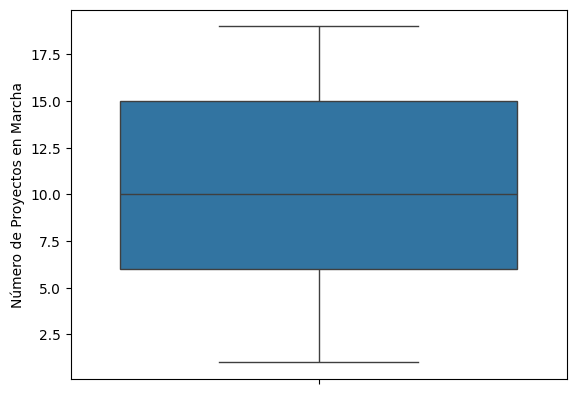

In [14]:
sns.boxplot(y=datos['Número de Proyectos en Marcha'])
plt.show()

In [15]:
# imputación de datos numericos con la media
datos['Número de Proyectos en Marcha'].fillna(datos['Número de Proyectos en Marcha'].median(), inplace=True)

<ipython-input-15-c2b3a1d5e94e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos['Número de Proyectos en Marcha'].fillna(datos['Número de Proyectos en Marcha'].median(), inplace=True)


In [16]:
#convertir a int
datos['Número de Comunidades Energéticas'] = pd.to_numeric(datos['Número de Comunidades Energéticas'], errors='coerce')

In [17]:
datos['Número de Comunidades Energéticas'].isnull().sum()

5

In [18]:
datos['Número de Comunidades Energéticas'].dtype

dtype('float64')

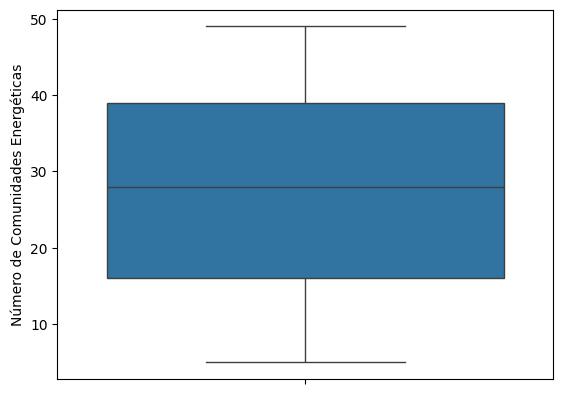

In [19]:
sns.boxplot(y=datos['Número de Comunidades Energéticas'])
plt.show()

In [20]:
# imputar datos
datos['Número de Comunidades Energéticas'].fillna(datos['Número de Comunidades Energéticas'].mean(), inplace=True)

<ipython-input-20-628a3aaf8bde>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos['Número de Comunidades Energéticas'].fillna(datos['Número de Comunidades Energéticas'].mean(), inplace=True)


In [21]:
# Capacidad Generada (MW)
datos['Capacidad Generada (MW)'] = pd.to_numeric(datos['Capacidad Generada (MW)'], errors='coerce')

In [22]:
datos['Capacidad Generada (MW)'].isnull().sum()

178

In [23]:
datos['Capacidad Generada (MW)'].fillna(datos['Capacidad Generada (MW)'].mean(), inplace=True)

<ipython-input-23-4a86b21bae1d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos['Capacidad Generada (MW)'].fillna(datos['Capacidad Generada (MW)'].mean(), inplace=True)


In [24]:
datos['Capacidad Generada (MW)'].isnull().sum()

0

In [25]:
# Reducción de CO2 (toneladas)
datos['Reducción de CO2 (toneladas)'] = pd.to_numeric(datos['Reducción de CO2 (toneladas)'], errors='coerce')

In [26]:
datos['Reducción de CO2 (toneladas)'].isnull().sum()

61

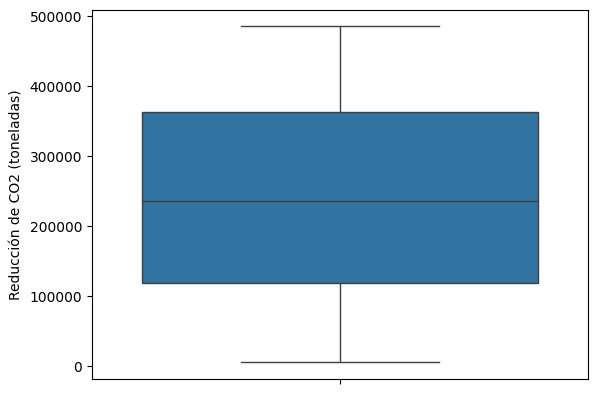

In [27]:
sns.boxplot(y=datos['Reducción de CO2 (toneladas)'])
plt.show()

In [28]:
datos['Reducción de CO2 (toneladas)'].fillna(datos['Reducción de CO2 (toneladas)'].mean(), inplace=True)

<ipython-input-28-40744b899214>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos['Reducción de CO2 (toneladas)'].fillna(datos['Reducción de CO2 (toneladas)'].mean(), inplace=True)


In [49]:
datos.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,0
Nivel de Democratización Energética,0
Número de Comunidades Energéticas,0
Número de Proyectos en Marcha,0
Capacidad Generada (MW),0
Reducción de CO2 (toneladas),0
Región,0
Costo de Producción ($/MW),0
Año de Instalación,0


# Imputación de datos categoricos

In [30]:
#datos[datos['Planta Energética']== 'error'] = datos[datos['Planta Energética']== 'error'] = np.nan

In [31]:
datos['Planta Energética'].unique()

array(['SolarFlow', 'SunWave', 'EcoWind', 'HydroFlux', 'VientoVerde',
       'WindStream', 'error', 'AquaPower', 'Solaris'], dtype=object)

In [32]:
datos['Planta Energética'] = datos['Planta Energética'].replace(["nan", 'error'], np.nan)

In [33]:
datos['Planta Energética'].isnull().sum()

5

In [34]:
datos['Planta Energética'].fillna(datos['Planta Energética'].mode()[0], inplace=True)

<ipython-input-34-ff78b5e41df5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos['Planta Energética'].fillna(datos['Planta Energética'].mode()[0], inplace=True)


In [35]:
# imputación para Tipo de energia
datos['Tipo de Energía'].unique()

array(['Solar', nan, 'Geotérmica', 'Hidrógeno verde', 'Hidráulica',
       'Eólica', 'error'], dtype=object)

In [36]:
datos['Tipo de Energía'] = datos['Tipo de Energía'].replace(["nan", 'error'], np.nan)

In [37]:
datos['Tipo de Energía'].isnull().sum()

78

In [38]:
datos['Tipo de Energía'].fillna(datos['Tipo de Energía'].mode()[0], inplace=True)

<ipython-input-38-d8e958c969d8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos['Tipo de Energía'].fillna(datos['Tipo de Energía'].mode()[0], inplace=True)


In [39]:
# imputación para Nivel de Democratización Energética
datos['Nivel de Democratización Energética'].unique()

array(['Alto', 'Bajo', nan, 'Medio', 'error'], dtype=object)

In [40]:
datos['Nivel de Democratización Energética'] = datos['Nivel de Democratización Energética'].replace(["nan", 'error'], np.nan)

In [41]:
datos['Nivel de Democratización Energética'].isnull().sum()

106

In [42]:
datos['Nivel de Democratización Energética'].fillna(datos['Nivel de Democratización Energética'].mode()[0], inplace=True)

<ipython-input-42-9a8b70edad16>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos['Nivel de Democratización Energética'].fillna(datos['Nivel de Democratización Energética'].mode()[0], inplace=True)


In [43]:
#imputación para Región
datos['Región'].unique()

array(['Sur', 'Oeste', 'Este', 'Norte', nan], dtype=object)

In [44]:
#for i in datos['Región']:
#    if i not in ['Sur', 'Oeste', 'Este', 'Norte']:
#      datos[datos['Región']== i] = np.nan

In [45]:
datos['Región'].fillna(datos['Región'].mode()[0], inplace=True)

<ipython-input-45-0b017851ba0a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos['Región'].fillna(datos['Región'].mode()[0], inplace=True)


In [46]:
datos.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,0
Nivel de Democratización Energética,0
Número de Comunidades Energéticas,0
Número de Proyectos en Marcha,0
Capacidad Generada (MW),0
Reducción de CO2 (toneladas),0
Región,0
Costo de Producción ($/MW),0
Año de Instalación,0


In [47]:
datos.describe()

,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,27.523618,10.213000,494.468248,240099.515545,2620.846302,2012.175000,0.58400
std,13.001432,4.903231,260.617295,135578.147382,653.454384,5.605872,0.49314
min,5.000000,1.000000,10.180000,4956.299464,1542.598865,2005.000000,0.00000
25%,16.000000,7.000000,299.587500,127118.370200,2044.109301,2005.000000,0.00000
50%,27.523618,10.000000,494.468248,240099.515545,2620.846302,2010.000000,1.00000
75%,39.000000,14.000000,692.315000,356309.488282,3197.583303,2015.000000,1.00000
max,49.000000,19.000000,997.650000,485722.216166,3749.244782,2020.000000,1.00000


In [48]:
datos.tail(10)

,Planta Energética,Tipo de Energía,Nivel de Democratización Energética,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Región,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
990,WindStream,Solar,Bajo,41.0,13.0,715.540000,348372.349577,Este,1943.807214,2010,0
991,SunWave,Solar,Bajo,12.0,10.0,201.230000,97972.116032,Este,3398.187477,2005,0
992,WindStream,Geotérmica,Alto,11.0,8.0,476.600000,232040.503408,Oeste,3448.338521,2005,0
993,SunWave,Solar,Medio,18.0,7.0,477.790000,232619.874367,Este,3097.281216,2020,1
994,SunWave,Geotérmica,Medio,7.0,10.0,384.440000,187170.900399,Este,3648.942695,2010,0
995,EcoWind,Hidrógeno verde,Bajo,20.0,10.0,522.120000,254202.659755,Norte,2996.979129,2020,1
996,Solaris,Eólica,Medio,23.0,7.0,494.468248,203987.264200,Este,2846.525998,2010,1
997,SunWave,Eólica,Bajo,22.0,10.0,207.350000,100951.738107,Norte,2896.677042,2005,0
998,VientoVerde,Eólica,Bajo,20.0,16.0,418.240000,240099.515545,Este,2996.979129,2015,1
999,HydroFlux,Eólica,Medio,12.0,3.0,494.468248,39703.951013,Sur,3398.187477,2005,1


# Generación de Estadísticas Descriptivas

In [50]:
datos.describe()

,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,27.523618,10.213000,494.468248,240099.515545,2620.846302,2012.175000,0.58400
std,13.001432,4.903231,260.617295,135578.147382,653.454384,5.605872,0.49314
min,5.000000,1.000000,10.180000,4956.299464,1542.598865,2005.000000,0.00000
25%,16.000000,7.000000,299.587500,127118.370200,2044.109301,2005.000000,0.00000
50%,27.523618,10.000000,494.468248,240099.515545,2620.846302,2010.000000,1.00000
75%,39.000000,14.000000,692.315000,356309.488282,3197.583303,2015.000000,1.00000
max,49.000000,19.000000,997.650000,485722.216166,3749.244782,2020.000000,1.00000


# cuantitativos

In [55]:
# Datos numericos
# Número de Comunidades Energéticas
# Número de Proyectos en Marcha
# Capacidad Generada (MW)
# Reducción de CO2 (toneladas)
# Costo de Producción ($/MW)
# Año de Instalación
# Rentabilidad en 10 años (Rentable=1, No Rentable=0)

In [56]:
#meadiana
#mediana1 = np.median(datos['Número de Proyectos en Marcha'])
#print(f'mediana del Número de Proyectos en Marcha {mediana1}')
mediana1 = np.median(datos['Número de Comunidades Energéticas'])
print(f'mediana del Número de Comunidades Energéticas {mediana1}')

mediana2 = np.median(datos['Costo de Producción ($/MW)'])
print(f'mediana del Costo de Producción ($/MW) {mediana2}')

mediana3 = np.median(datos['Año de Instalación'])
print(f'mediana del Año de Instalación {mediana3}')

mediana4 = np.median(datos['Rentabilidad en 10 años (Rentable=1, No Rentable=0)'])
print(f'mediana de Rentabilidad en 10 años (Rentable=1, No Rentable=0) {mediana4}')

mediana5 = np.median(datos['Número de Proyectos en Marcha'])
print(f'mediana del Número de Proyectos en Marcha {mediana5}')

mediana6 = np.median(datos['Capacidad Generada (MW)'])
print(f'mediana del Capacidad Generada (MW) {mediana6}')

mediana7 = np.median(datos['Reducción de CO2 (toneladas)'])
print(f'mediana del Reducción de CO2 (toneladas) {mediana7}')

mediana del Número de Comunidades Energéticas 27.52361809045226
mediana del Costo de Producción ($/MW) 2620.846301885278
mediana del Año de Instalación 2010.0
mediana de Rentabilidad en 10 años (Rentable=1, No Rentable=0) 1.0
mediana del Número de Proyectos en Marcha 10.0
mediana del Capacidad Generada (MW) 494.4682481751825
mediana del Reducción de CO2 (toneladas) 240099.51554517832


In [57]:
#moda
moda1 = datos['Número de Proyectos en Marcha'].mode()
print(f'moda del Número de Proyectos en Marcha {moda1[0]} \n')

moda2 = datos['Costo de Producción ($/MW)'].mode()
print(f'moda del Costo de Producción ($/MW) {moda2[0]} \n')

moda3 = datos['Año de Instalación'].mode()
print(f'moda del Año de Instalación {moda3[0]} \n')

moda4 = datos['Rentabilidad en 10 años (Rentable=1, No Rentable=0)'].mode()
print(f'moda de Rentabilidad en 10 años (Rentable=1, No Rentable=0) {moda4[0]} \n')

moda5 = datos['Número de Comunidades Energéticas'].mode()
print(f'moda del Número de Comunidades Energéticas {moda5[0]} \n')

moda6 = datos['Capacidad Generada (MW)'].mode()
print(f'moda del Capacidad Generada (MW) {moda6[0]} \n')

moda7 = datos['Reducción de CO2 (toneladas)'].mode()
print(f'moda del Reducción de CO2 (toneladas) {moda7[0]}')

moda del Número de Proyectos en Marcha 10.0 

moda del Costo de Producción ($/MW) 2946.8280850760307 

moda del Año de Instalación 2005 

moda de Rentabilidad en 10 años (Rentable=1, No Rentable=0) 1 

moda del Número de Comunidades Energéticas 21.0 

moda del Capacidad Generada (MW) 494.4682481751825 

moda del Reducción de CO2 (toneladas) 240099.51554517832


In [58]:
#varianza
varianza1 = np.var(datos['Número de Proyectos en Marcha'])
print(f'varianza del Número de Proyectos en Marcha {varianza1}')

varianza2 = np.var(datos['Costo de Producción ($/MW)'])
print(f'varianza del Costo de Producción ($/MW) {varianza2}')

varianza3 = np.var(datos['Año de Instalación'])
print(f'varianza del Año de Instalación {varianza3}')

varianza4 = np.var(datos['Rentabilidad en 10 años (Rentable=1, No Rentable=0)'])
print(f'varianza de Rentabilidad en 10 años (Rentable=1, No Rentable=0) {varianza4}')

varianza5 = np.var(datos['Número de Comunidades Energéticas'])
print(f'varianza del Número de Comunidades Energéticas {varianza5}')

varianza6 = np.var(datos['Capacidad Generada (MW)'])
print(f'varianza del Capacidad Generada (MW) {varianza6}')

varianza7 = np.var(datos['Reducción de CO2 (toneladas)'])
print(f'varianza del Reducción de CO2 (toneladas) {varianza7}')


varianza del Número de Proyectos en Marcha 24.01763099999991
varianza del Costo de Producción ($/MW) 426575.6287001382
varianza del Año de Instalación 31.394375000000117
varianza de Rentabilidad en 10 años (Rentable=1, No Rentable=0) 0.24294400000000244
varianza del Número de Comunidades Energéticas 168.86819497487437
varianza del Capacidad Generada (MW) 67853.45291067738
varianza del Reducción de CO2 (toneladas) 18363052613.537807


# Cualitativos

In [59]:
#Planta Energética
#Tipo de Energía
#Nivel de Democratización Energética
#Región

In [60]:
datos['Planta Energética'].value_counts()

,count
Planta Energética,
SunWave,150
VientoVerde,134
Solaris,133
EcoWind,124
SolarFlow,119
WindStream,116
HydroFlux,112
AquaPower,112


<function matplotlib.pyplot.show(close=None, block=None)>

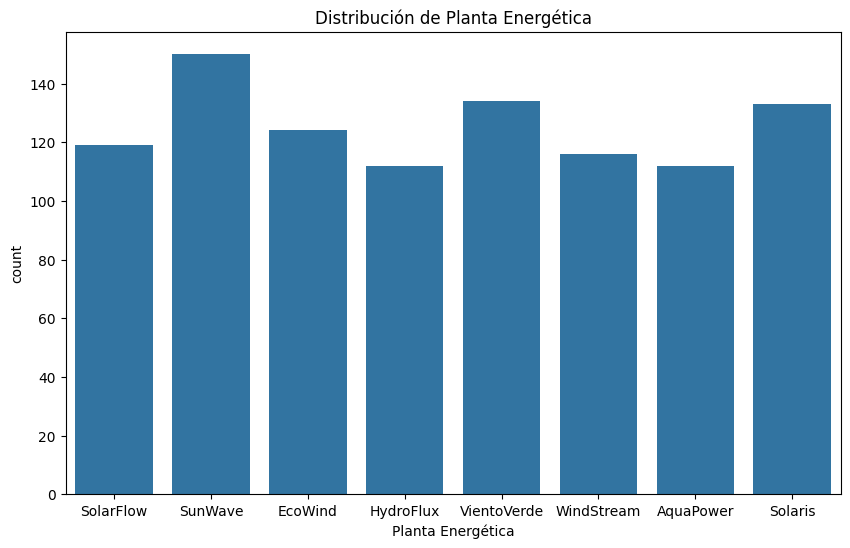

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Planta Energética', data=datos)
plt.title('Distribución de Planta Energética')
plt.show

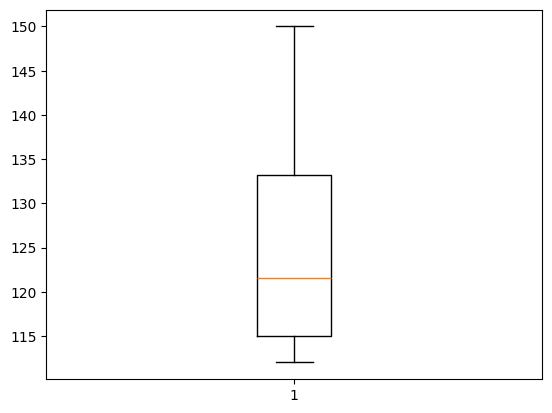

In [62]:
plt.boxplot(datos['Planta Energética'].value_counts())

plt.show()

# Visualización de datos utilizando gráficos de barras, histogramas y gráficos de dispersión

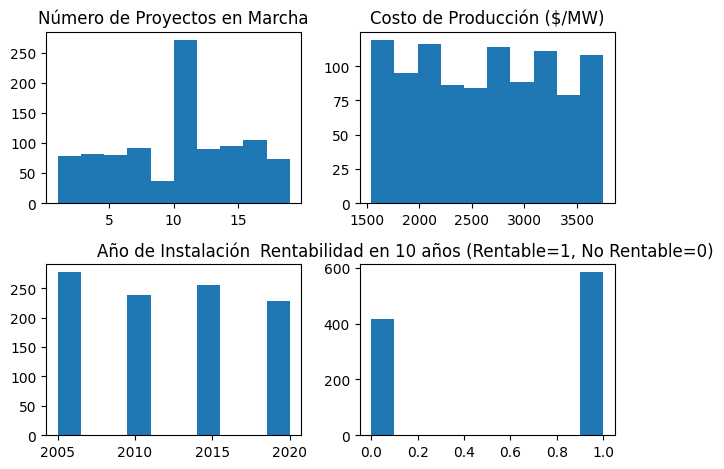

In [85]:
# hist
plt.subplot(2, 2, 1)
plt.hist(datos['Número de Proyectos en Marcha'])
plt.title('Número de Proyectos en Marcha')

plt.subplot(2, 2, 2)
plt.hist(datos['Costo de Producción ($/MW)'])
plt.title('Costo de Producción ($/MW)')

plt.subplot(2, 2, 3)
plt.hist(datos['Año de Instalación'])
plt.title('Año de Instalación')

plt.subplot(2, 2, 4)
plt.hist(datos['Rentabilidad en 10 años (Rentable=1, No Rentable=0)'])
plt.title('Rentabilidad en 10 años (Rentable=1, No Rentable=0)')

plt.tight_layout()
plt.show()

In [86]:
# DATOS ORDINALES
# Planta Energética
# Tipo de Energía
# Nivel de Democratización Energética
# Número de Comunidades Energéticas
# Capacidad Generada (MW)
# Reducción de CO2 (toneladas)
# Región

# Aplicación de técnicas de One-hot encoding, Label encoding, y Ordinal encoding.

In [67]:
# df original
datos

,Planta Energética,Tipo de Energía,Nivel de Democratización Energética,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Región,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
0,SolarFlow,Solar,Alto,42.0,1.0,100.460000,48910.593731,Sur,1893.656170,2005,1
1,SunWave,Solar,Bajo,12.0,17.0,494.468248,156615.168141,Oeste,3398.187477,2015,0
2,EcoWind,Solar,Bajo,47.0,10.0,52.620000,25618.907447,Sur,1642.900952,2010,0
3,SolarFlow,Geotérmica,Medio,24.0,11.0,494.468248,381289.383642,Este,2796.374954,2010,1
4,HydroFlux,Hidrógeno verde,Medio,37.0,5.0,404.250000,196815.722834,Norte,2144.411388,2020,1
...,...,...,...,...,...,...,...,...,...,...,...
995,EcoWind,Hidrógeno verde,Bajo,20.0,10.0,522.120000,254202.659755,Norte,2996.979129,2020,1
996,Solaris,Eólica,Medio,23.0,7.0,494.468248,203987.264200,Este,2846.525998,2010,1
997,SunWave,Eólica,Bajo,22.0,10.0,207.350000,100951.738107,Norte,2896.677042,2005,0
998,VientoVerde,Eólica,Bajo,20.0,16.0,418.240000,240099.515545,Este,2996.979129,2015,1


In [64]:
# aplicación de técnicas One-Hot encoding
# división
datos_onehot = pd.get_dummies(datos, columns=['Planta Energética', 'Tipo de Energía', 'Nivel de Democratización Energética', 'Región'])
datos_onehot

,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)",Planta Energética_AquaPower,Planta Energética_EcoWind,Planta Energética_HydroFlux,...,Tipo de Energía_Hidráulica,Tipo de Energía_Hidrógeno verde,Tipo de Energía_Solar,Nivel de Democratización Energética_Alto,Nivel de Democratización Energética_Bajo,Nivel de Democratización Energética_Medio,Región_Este,Región_Norte,Región_Oeste,Región_Sur
0,42.0,1.0,100.460000,48910.593731,1893.656170,2005,1,False,False,False,...,False,False,True,True,False,False,False,False,False,True
1,12.0,17.0,494.468248,156615.168141,3398.187477,2015,0,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,47.0,10.0,52.620000,25618.907447,1642.900952,2010,0,False,True,False,...,False,False,True,False,True,False,False,False,False,True
3,24.0,11.0,494.468248,381289.383642,2796.374954,2010,1,False,False,False,...,False,False,False,False,False,True,True,False,False,False
4,37.0,5.0,404.250000,196815.722834,2144.411388,2020,1,False,False,True,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20.0,10.0,522.120000,254202.659755,2996.979129,2020,1,False,True,False,...,False,True,False,False,True,False,False,True,False,False
996,23.0,7.0,494.468248,203987.264200,2846.525998,2010,1,False,False,False,...,False,False,False,False,False,True,True,False,False,False
997,22.0,10.0,207.350000,100951.738107,2896.677042,2005,0,False,False,False,...,False,False,False,False,True,False,False,True,False,False
998,20.0,16.0,418.240000,240099.515545,2996.979129,2015,1,False,False,False,...,False,False,False,False,True,False,True,False,False,False


In [65]:
# libreria de lable enconder
from sklearn.preprocessing import LabelEncoder

In [68]:
datos['Planta Energética'].unique()

array(['SolarFlow', 'SunWave', 'EcoWind', 'HydroFlux', 'VientoVerde',
       'WindStream', 'AquaPower', 'Solaris'], dtype=object)

In [66]:
# label encoding al df
datos_label = datos.copy()
datos_label['Planta Energética'] = LabelEncoder().fit_transform(datos_label['Planta Energética'])
datos_label

,Planta Energética,Tipo de Energía,Nivel de Democratización Energética,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Región,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
0,3,Solar,Alto,42.0,1.0,100.460000,48910.593731,Sur,1893.656170,2005,1
1,5,Solar,Bajo,12.0,17.0,494.468248,156615.168141,Oeste,3398.187477,2015,0
2,1,Solar,Bajo,47.0,10.0,52.620000,25618.907447,Sur,1642.900952,2010,0
3,3,Geotérmica,Medio,24.0,11.0,494.468248,381289.383642,Este,2796.374954,2010,1
4,2,Hidrógeno verde,Medio,37.0,5.0,404.250000,196815.722834,Norte,2144.411388,2020,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1,Hidrógeno verde,Bajo,20.0,10.0,522.120000,254202.659755,Norte,2996.979129,2020,1
996,4,Eólica,Medio,23.0,7.0,494.468248,203987.264200,Este,2846.525998,2010,1
997,5,Eólica,Bajo,22.0,10.0,207.350000,100951.738107,Norte,2896.677042,2005,0
998,6,Eólica,Bajo,20.0,16.0,418.240000,240099.515545,Este,2996.979129,2015,1


In [70]:
# ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

In [71]:
# ordinal enconding (decimales)
datos_ordinal = datos.copy()
datos_ordinal['Planta Energética'] = OrdinalEncoder().fit_transform(datos_ordinal[['Planta Energética']])
datos_ordinal

,Planta Energética,Tipo de Energía,Nivel de Democratización Energética,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Región,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
0,3.0,Solar,Alto,42.0,1.0,100.460000,48910.593731,Sur,1893.656170,2005,1
1,5.0,Solar,Bajo,12.0,17.0,494.468248,156615.168141,Oeste,3398.187477,2015,0
2,1.0,Solar,Bajo,47.0,10.0,52.620000,25618.907447,Sur,1642.900952,2010,0
3,3.0,Geotérmica,Medio,24.0,11.0,494.468248,381289.383642,Este,2796.374954,2010,1
4,2.0,Hidrógeno verde,Medio,37.0,5.0,404.250000,196815.722834,Norte,2144.411388,2020,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,Hidrógeno verde,Bajo,20.0,10.0,522.120000,254202.659755,Norte,2996.979129,2020,1
996,4.0,Eólica,Medio,23.0,7.0,494.468248,203987.264200,Este,2846.525998,2010,1
997,5.0,Eólica,Bajo,22.0,10.0,207.350000,100951.738107,Norte,2896.677042,2005,0
998,6.0,Eólica,Bajo,20.0,16.0,418.240000,240099.515545,Este,2996.979129,2015,1


# Cálculo y visualización de matrices de correlación.

In [73]:
# false= 0 & true = 1
datos_onehot.corr()

,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)",Planta Energética_AquaPower,Planta Energética_EcoWind,Planta Energética_HydroFlux,...,Tipo de Energía_Hidráulica,Tipo de Energía_Hidrógeno verde,Tipo de Energía_Solar,Nivel de Democratización Energética_Alto,Nivel de Democratización Energética_Bajo,Nivel de Democratización Energética_Medio,Región_Este,Región_Norte,Región_Oeste,Región_Sur
Número de Comunidades Energéticas,1.000000,-0.049075,0.003593,-0.011687,-0.997828,0.028102,0.025258,0.007291,0.005620,0.054745,...,-0.014051,0.028256,0.019559,0.005254,0.003866,-0.008043,-0.026295,-0.008078,-0.020281,0.056456
Número de Proyectos en Marcha,-0.049075,1.000000,-0.005949,0.023814,0.048015,-0.055110,-0.093722,-0.012200,-0.036783,0.019504,...,-0.027976,0.024626,0.032128,0.022075,0.029072,-0.045019,0.038628,-0.011605,-0.011632,-0.019019
Capacidad Generada (MW),0.003593,-0.005949,1.000000,0.877328,-0.001784,0.056912,-0.050665,-0.015083,0.014590,0.042206,...,0.035305,-0.019151,-0.007799,-0.010290,0.010547,-0.000102,-0.041887,0.012864,-0.008850,0.041560
Reducción de CO2 (toneladas),-0.011687,0.023814,0.877328,1.000000,0.013870,0.043779,-0.036017,-0.027563,0.006768,0.022667,...,0.039714,-0.010112,-0.011211,-0.030156,0.009702,0.018256,-0.058571,0.048853,-0.023087,0.038483
Costo de Producción ($/MW),-0.997828,0.048015,-0.001784,0.013870,1.000000,-0.026209,-0.025393,-0.011444,-0.006290,-0.055270,...,0.013133,-0.032023,-0.019499,-0.000867,-0.007468,0.007304,0.026113,0.004420,0.020436,-0.052830
Año de Instalación,0.028102,-0.055110,0.056912,0.043779,-0.026209,1.000000,-0.029040,0.014940,0.024531,0.046066,...,0.040802,0.028881,-0.038744,-0.021316,-0.015918,0.032836,-0.025089,-0.022345,0.027460,0.021939
"Rentabilidad en 10 años (Rentable=1, No Rentable=0)",0.025258,-0.093722,-0.050665,-0.036017,-0.025393,-0.029040,1.000000,-0.021925,0.034374,-0.047658,...,0.027185,0.017443,-0.003866,0.048042,-0.056123,0.006500,-0.038989,0.000895,0.061130,-0.019018
Planta Energética_AquaPower,0.007291,-0.012200,-0.015083,-0.027563,-0.011444,0.014940,-0.021925,1.000000,-0.133617,-0.126126,...,0.035224,0.001665,-0.067439,-0.021592,0.016080,0.005080,-0.037749,-0.038697,-0.013261,0.091912
Planta Energética_EcoWind,0.005620,-0.036783,0.014590,0.006768,-0.006290,0.024531,0.034374,-0.133617,1.000000,-0.133617,...,-0.014854,0.002356,0.022310,0.046363,0.014803,-0.054076,-0.047267,-0.012925,0.061140,0.003477
Planta Energética_HydroFlux,0.054745,0.019504,0.042206,0.022667,-0.055270,0.046066,-0.047658,-0.126126,-0.133617,1.000000,...,-0.029053,0.079707,-0.003306,0.007045,0.001567,-0.007620,-0.065222,0.022147,0.009343,0.039791


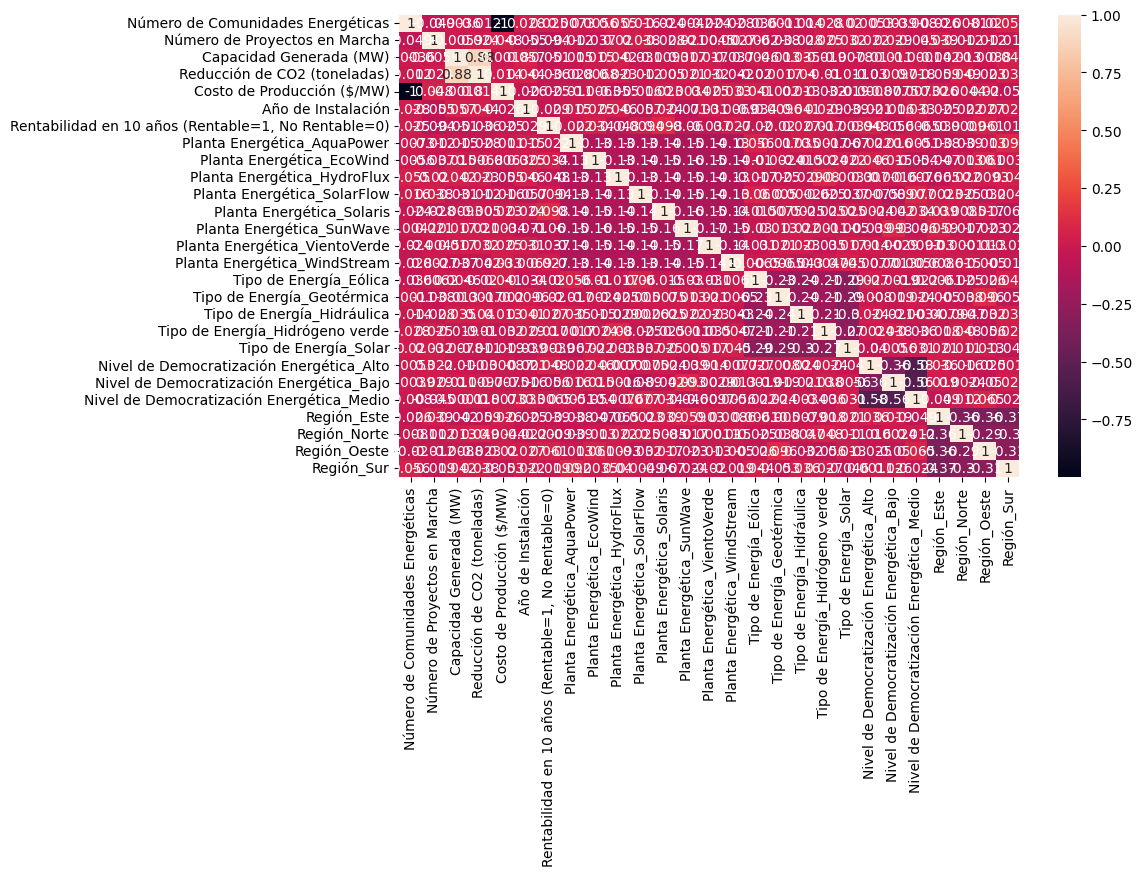

In [74]:
# grafico de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(datos_onehot.corr(), annot=True)
plt.show()

# Aplicación de PCA para reducir la dimensionalidad de datasets

In [75]:
#PCA
from sklearn.decomposition import PCA
# escalador de datos
from sklearn.preprocessing import StandardScaler

In [76]:
# Escalar datos
escalador = StandardScaler()
datos_escalados = escalador.fit_transform(datos_onehot)

In [78]:
# modelo
pca = PCA(n_components=2)
datos_pca = pca.fit_transform(datos_escalados)
datos_pca

array([[-1.83951065, -2.46881461],
       [ 1.79015909, -0.08764477],
       [-2.30567404, -2.10402166],
       ...,
       [ 0.89015952, -1.10602713],
       [ 1.23018029, -0.24479733],
       [ 1.16832991, -0.53644658]])

In [79]:
# colunas PC1 & PC2
pca_datos_df = pd.DataFrame(data=datos_pca, columns=['PC1', 'PC2'])
pca_datos_df

,PC1,PC2
0,-1.839511,-2.468815
1,1.790159,-0.087645
2,-2.305674,-2.104022
3,0.576896,0.239181
4,-1.633585,-0.080971
...,...,...
995,0.350408,0.535019
996,0.953745,-0.592748
997,0.890160,-1.106027
998,1.230180,-0.244797


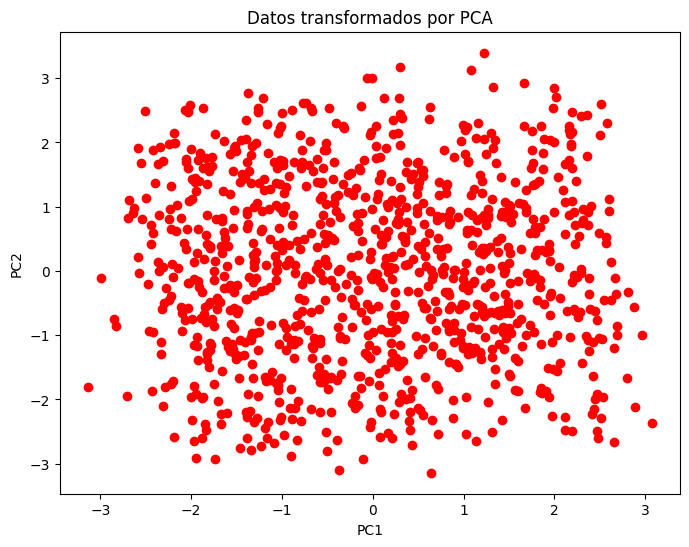

In [81]:
# Scatter
plt.figure(figsize=(8,6))
plt.scatter(pca_datos_df['PC1'], pca_datos_df['PC2'], c='red', marker='o')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Datos transformados por PCA')
plt.show()